In [1]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torch.optim as optim

In [ ]:
df = pd.read_csv("/content/fmnist_small.csv")
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


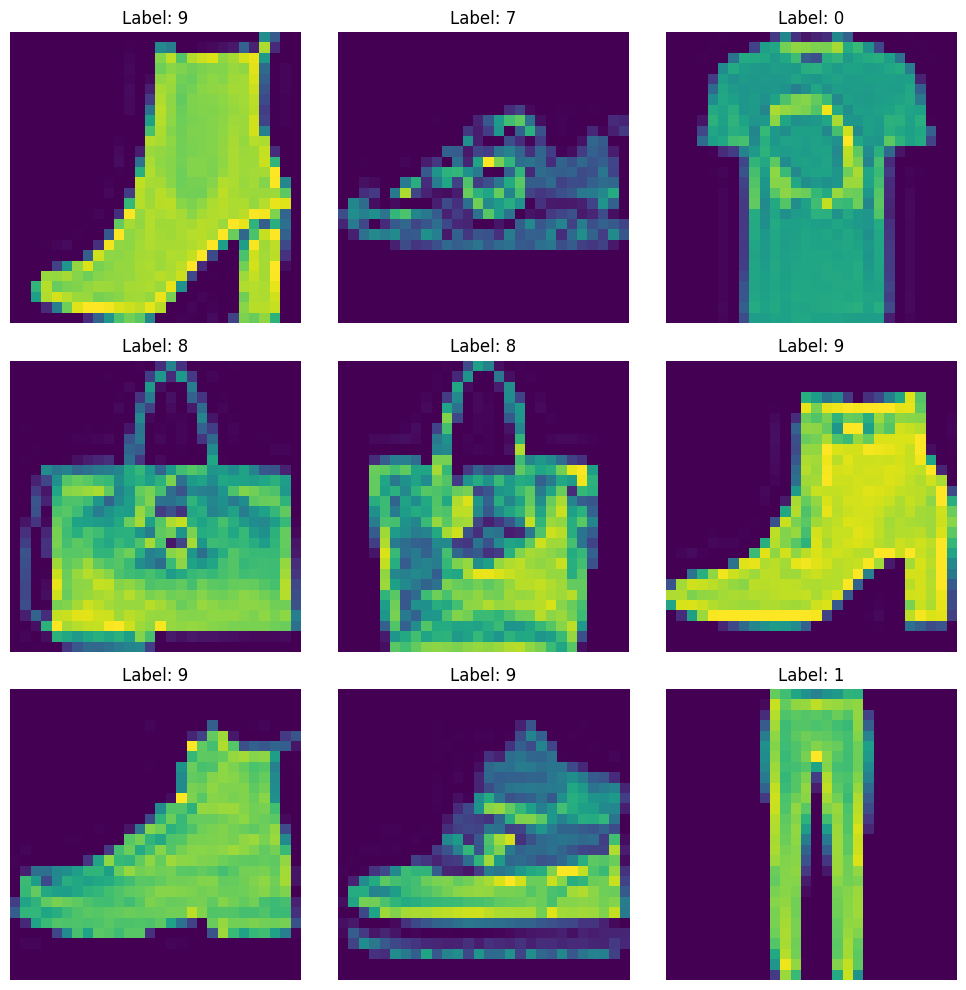

In [3]:
fig, axes = plt.subplots(3,3, figsize=(10,10))

for i, ax in enumerate(axes.flat):
    img = df.iloc[i , 1:].values.reshape(28, 28)
    ax.imshow(img)
    ax.set_title(f"Label: {df.iloc[i, 0]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [4]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [5]:
X = X / 255.0

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Dataset Loading

In [7]:
class CustromDataset(Dataset):

    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype= torch.float32)
        self.y = torch.tensor(y, dtype= torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return self.X[index], self.y[index]

In [8]:
train_dataset = CustromDataset(X_train, y_train)
test_dataset = CustromDataset(X_test, y_test)

In [9]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [10]:
len(train_loader), len(test_loader)  # No of Batches

(150, 38)

In [11]:
class MyModel(nn.Module):
    def __init__(self, num_features):
        super().__init__()

        self.model = nn.Sequential(
            nn.Linear(num_features, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        return self.model(x)


In [12]:
learning_rate = 0.1
epochs = 100

In [13]:
model = MyModel(28*28)

loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [14]:
for epoch in range(epochs):
    total_loss = 0

    for batch_features, batch_labels in train_loader:
        outputs = model(batch_features)
        loss = loss_function(outputs, batch_labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}")

Epoch [1/100], Loss: 1.3072
Epoch [2/100], Loss: 0.7711
Epoch [3/100], Loss: 0.6603
Epoch [4/100], Loss: 0.5873
Epoch [5/100], Loss: 0.5517
Epoch [6/100], Loss: 0.5094
Epoch [7/100], Loss: 0.4787
Epoch [8/100], Loss: 0.4499
Epoch [9/100], Loss: 0.4400
Epoch [10/100], Loss: 0.4098
Epoch [11/100], Loss: 0.3874
Epoch [12/100], Loss: 0.3631
Epoch [13/100], Loss: 0.3518
Epoch [14/100], Loss: 0.3379
Epoch [15/100], Loss: 0.3257
Epoch [16/100], Loss: 0.3085
Epoch [17/100], Loss: 0.3081
Epoch [18/100], Loss: 0.3046
Epoch [19/100], Loss: 0.2724
Epoch [20/100], Loss: 0.2740
Epoch [21/100], Loss: 0.2627
Epoch [22/100], Loss: 0.2477
Epoch [23/100], Loss: 0.2383
Epoch [24/100], Loss: 0.2351
Epoch [25/100], Loss: 0.2330
Epoch [26/100], Loss: 0.2166
Epoch [27/100], Loss: 0.2154
Epoch [28/100], Loss: 0.2011
Epoch [29/100], Loss: 0.2014
Epoch [30/100], Loss: 0.1880
Epoch [31/100], Loss: 0.1822
Epoch [32/100], Loss: 0.1945
Epoch [33/100], Loss: 0.1664
Epoch [34/100], Loss: 0.1597
Epoch [35/100], Loss: 0

In [15]:
model.eval()

with torch.no_grad():
    correct = 0
    total = 0

    for batch_features, batch_labels in test_loader:
        outputs = model.forward(batch_features)
        _, predicted = torch.max(outputs, 1)

        total += batch_labels.size(0)
        correct += (predicted == batch_labels).sum().item()

accuracy = correct / total
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 84.17%
